# Word_cloud (https://github.com/amueller/word_cloud)

In [28]:
# !pip install wordcloud
# !pip install multidict

You should consider upgrading via the 'C:\Users\nao22\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\nao22\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import os

from os import path

import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib

import collections
import glob
import multidict as multidict

In [3]:
f = open("F:/Wikipedia/wikiextractor-master/wikiextractor/f_scientist/A・グレイス・クック",\
         "r", encoding='UTF-8')
text= f.read()
text

'アリス・グレイス・クック(、1887年 - 1958年)はイギリスの天文学者である。「A・グレイス・クック」あるいは「グレイス・クック」としても知られている。業績.クックはカロライン・ハーシェルの曾孫にあたるジョゼフ・ハードカッスルの講義を聴いて天文学に関心を持つようになり、ハードカッスルに望遠鏡を借りるなど、研究を始める際の支援を受けた。のちにクックはフランクリン＝アダムズが撮影した一連の画像を用いてハードカッスルとともにニュージェネラルカタログにある785個の天体を特定し、記述するという仕事を行っている。1911年に英国天文学協会のメンバーとなり、1915年に王立天文学会のフェローに選ばれた 。クックははじめてフェローに選ばれた4人の女性のうちのひとりであった。流星の観察で有名であり、また黄道光やオーロラなどの肉眼で観察できる現象についても観測を行っていた。クックは銀河系の新星の調査も実施した。クックは1918年に見つかった新星V603 Aquilaeの発見者のひとりである。この業績のおかげでクックは1921年から1923年まで、マリア・ミッチェル協会からエドワード・C・ピッカリング・フェローシップを受けることになった。クックはフィアメッタ・ウィルソンとともに英国天文学協会の流星部門のトップをつとめた。生涯.クックはサフォーク州ストウマーケットに住んでいた 。1958年に亡くなり、同業者たちから熟達した熱心な天文学者として顕彰された。フィアメッタ・ウィルソンと親しく、ウィルソンの追悼記事はクックが書いている。'

In [4]:
m = MeCab.Tagger('-r/nul -d"C:/Program Files (x86)/MeCab/dic/ipadic"')
keyword = m.parse(text) 

words = []
for row in keyword.split("\n"):
    word = row.split("\t")[0]
    if word == "EOS":
        break
    else:
        pos = row.split("\t")[1].split(",")[0]
        if pos == "名詞":
                words.append(word)
        else:
            pos = row.split("\t")[1].split(",")[0]
            if pos == "形容詞":
                words.append(word)
            else:
                pos = row.split("\t")[1].split(",")[0]
                if pos == "動詞":
                    words.append(word)

w =','. join(words)
keywords = w.replace(',',' ')
print(keywords)

アリス グレ イス クック (、 1887 年 - 1958 年 ) イギリス 天文学 者 A グレ イス クック グレイス・クック 知ら れ いる 業績 . クック カロライン・ハーシェル 曾孫 ジョゼフ ハードカッスル 講義 聴い 天文学 関心 持つ よう なり ハードカッスル 望遠鏡 借りる 研究 始める 際 支援 受け のち クック フランクリン アダムズ 撮影 し 一連 画像 用い ハードカッスル ニュージェネラルカタログ ある 785 個 天体 特定 し 記述 する 仕事 行っ いる 1911 年 英国 天文学 協会 メンバー なり 1915 年 王立 天文 学会 フェロー 選ば れ クック ロー 選ば れ 4 人 女性 うち ひとり 流星 観察 有名 黄道 光 オーロラ 肉眼 観察 できる 現象 観測 行っ い クック 銀河系 新星 調査 実施 し クック 1918 年 見つかっ 新星 V 603 Aquilae 発見 者 ひとり 業績 おかげ クック 1921 年 1923 年 マリア ミッチェル 協会 エドワード C ピッカリング・フェローシップ 受ける こと なっ クック フィアメッタ・ウィルソン 英国 天文学 協会 流星 部門 トップ つとめ 生涯 . クック サフォーク 州 ストウマーケット 住ん い 1958 年 亡くなり 業者 たち 熟達 し 熱心 天文学 者 顕彰 さ れ フィアメッタ・ウィルソン 親しく ウィルソン 追悼 記事 クック 書い いる


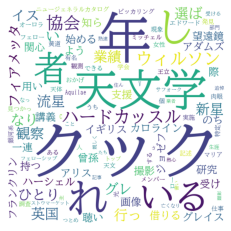

In [5]:

wordcloud = WordCloud(background_color="white",\
max_words=1000,\
font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
width=500,height=500).generate(keywords)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
# fields = ['word']

# df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)

# text = df['word'].values 



wordcloud = WordCloud(background_color="white", \
                      font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
                      max_words=10,width=500,height=500) \
.generate(str(text))



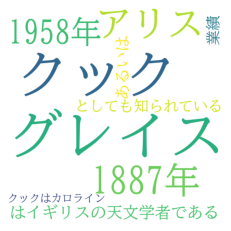

In [7]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
fields = ['word',"count"]

f_sc_all = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)
f_sc_all.set_index("word").to_dict()
f_sc_all_dict = f_sc_all.set_index("word").to_dict()['count']


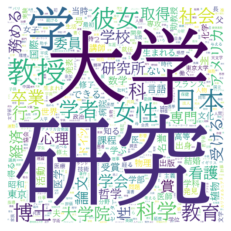

In [57]:
wc = WordCloud(background_color="white", max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",width=500,height=500)
    # generate word cloud
wc.generate_from_frequencies(f_sc_all_dict)
    # show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file("wordcloud.png")